In [191]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [300]:
#Dataset Link - https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

In [192]:

df = pd.read_csv('/Users/haripriyajanardhanrao/Documents/untitled folder/HP/projects/RiskHM/insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [193]:
df.size

40000

In [194]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [197]:
df = df.drop(['_c39'], axis = 1)

In [198]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [199]:
unique_values = df['authorities_contacted'].unique()
print(unique_values)

mode_value = df['authorities_contacted'].mode()[0]
print(mode_value)
df['authorities_contacted'].fillna(mode_value, inplace=True)




['Police' nan 'Fire' 'Other' 'Ambulance']
Police


In [200]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

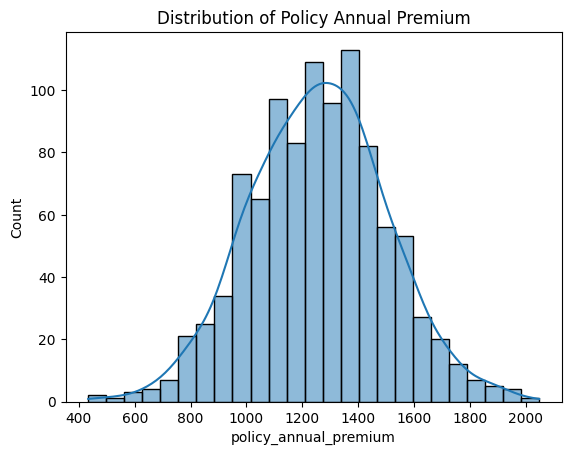

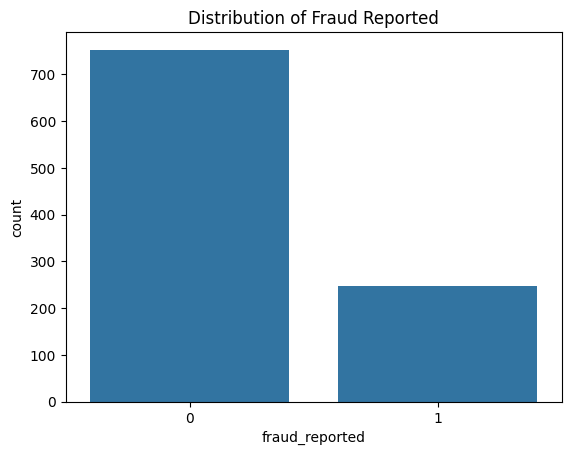

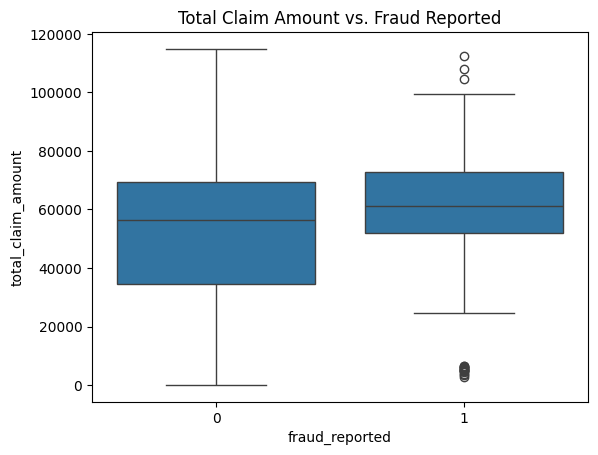

In [201]:
# Distribution of a continuous variable (e.g., policy_annual_premium)
import matplotlib.pyplot as plt
sns.histplot(df['policy_annual_premium'], kde=True)
plt.title('Distribution of Policy Annual Premium')
plt.show()

# Distribution of a categorical variable (e.g., fraud_reported)
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()

# Box plot to analyze outliers in 'total_claim_amount'
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Total Claim Amount vs. Fraud Reported')
plt.show()


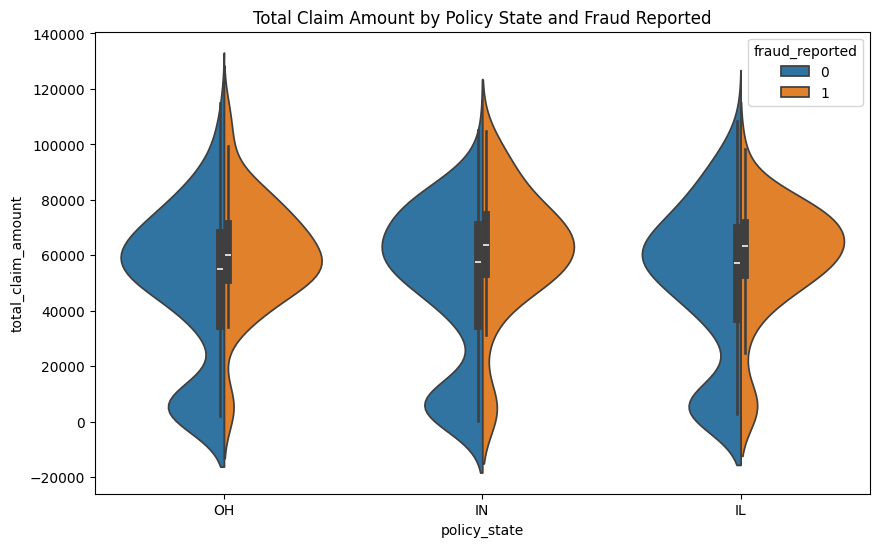

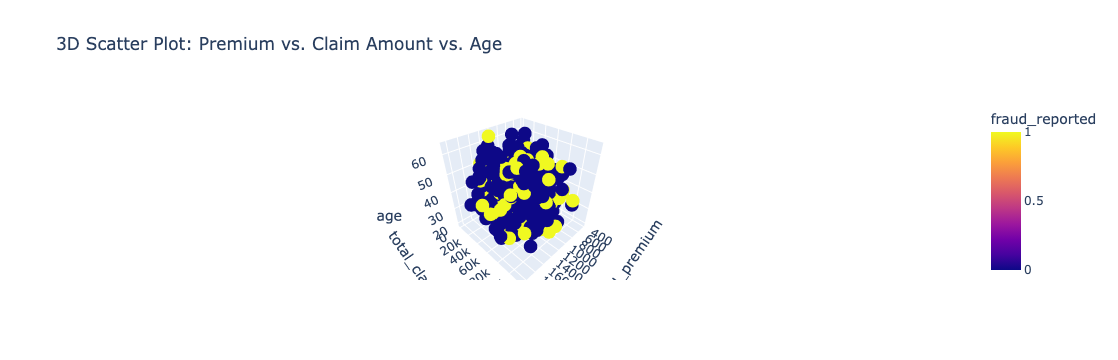

In [202]:
# Violin plot to analyze the distribution of 'total_claim_amount' across 'policy_state' and 'fraud_reported'
plt.figure(figsize=(10, 6))
sns.violinplot(x='policy_state', y='total_claim_amount', hue='fraud_reported', split=True, data=df)
plt.title('Total Claim Amount by Policy State and Fraud Reported')
plt.show()

# 3D scatter plot (using Plotly for interactive visualization)
import plotly.express as px
fig = px.scatter_3d(df, x='policy_annual_premium', y='total_claim_amount', z='age',
                    color='fraud_reported', title='3D Scatter Plot: Premium vs. Claim Amount vs. Age')
fig.show()

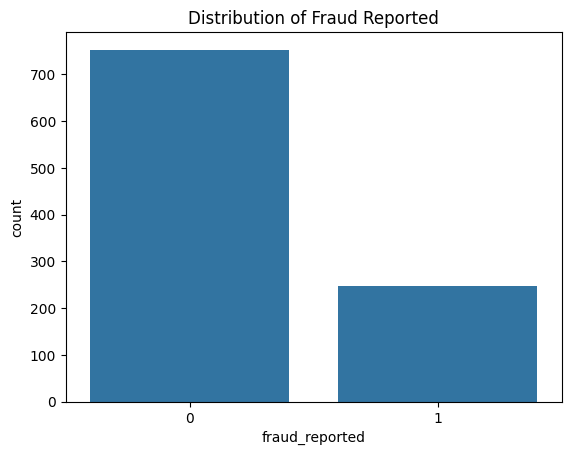

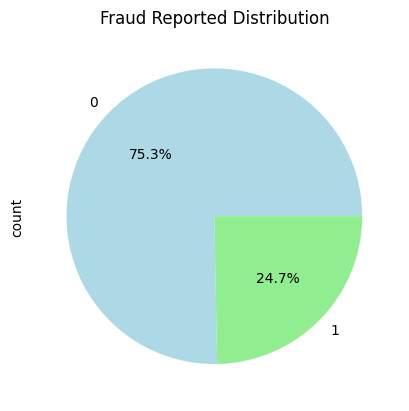

In [203]:
# Bar plot for target variable distribution
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()

# Pie chart for target variable distribution
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Fraud Reported Distribution')
plt.show()

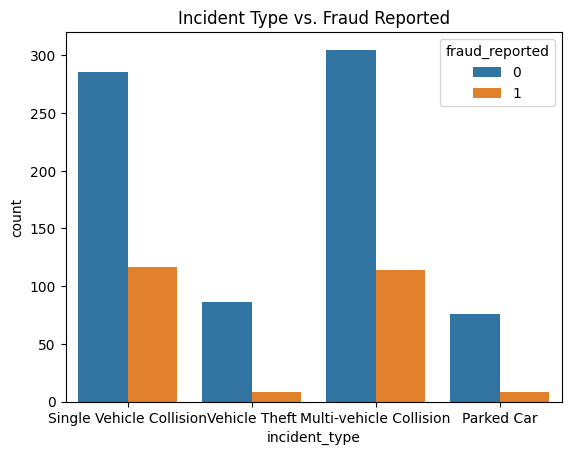

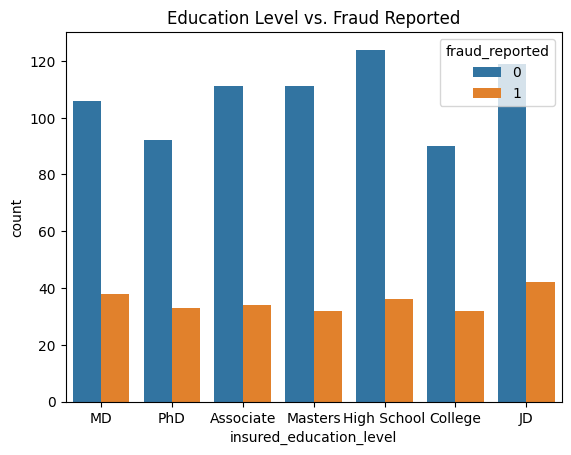

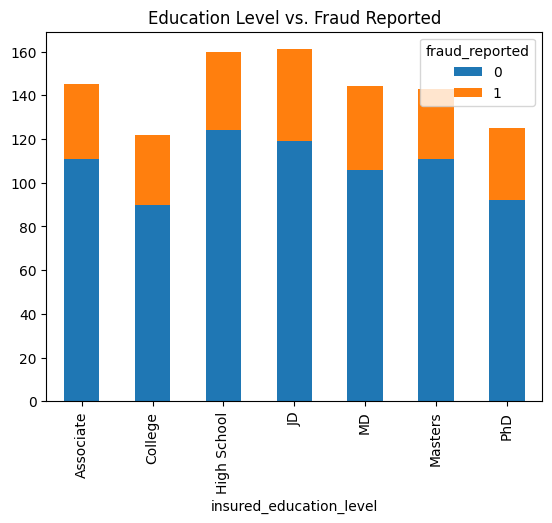

In [217]:
# Bar plot of a categorical feature with the target variable
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.title('Incident Type vs. Fraud Reported')
plt.show()

# Bar plot of a categorical feature with the target variable
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df)
plt.title('Education Level vs. Fraud Reported')
plt.show()

# Stacked bar chart to show relationship between 'insured_education_level' and 'fraud_reported'
pd.crosstab(df['insured_education_level'], df['fraud_reported']).plot(kind='bar', stacked=True)
plt.title('Education Level vs. Fraud Reported')
plt.show()

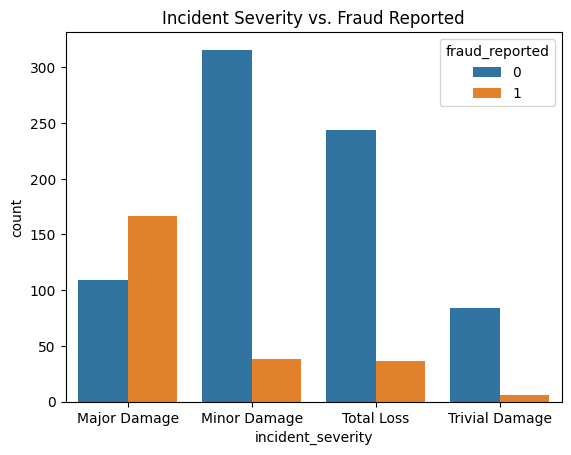

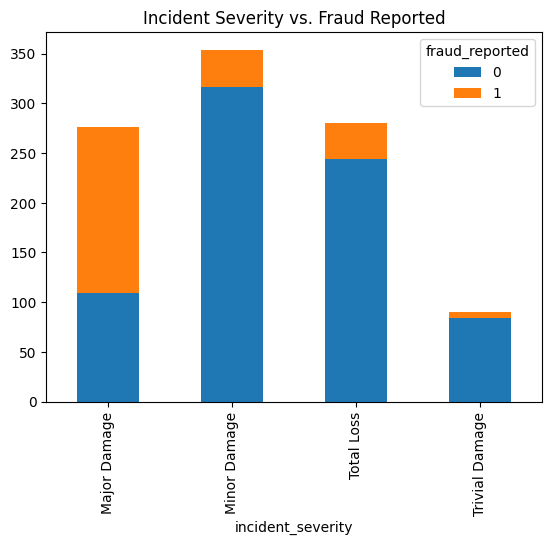

In [223]:


# Bar plot of a categorical feature with the target variable
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title('Incident Severity vs. Fraud Reported')
plt.show()

# Stacked bar chart to show relationship between 'insured_education_level' and 'fraud_reported'
pd.crosstab(df['incident_severity'], df['fraud_reported']).plot(kind='bar', stacked=True)
plt.title('Incident Severity vs. Fraud Reported')
plt.show()

In [225]:
print(df.columns.tolist())

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']


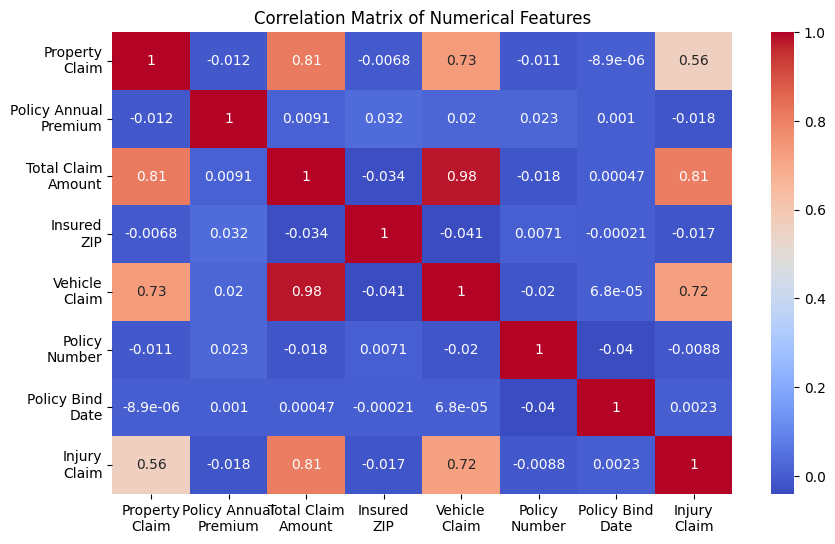

In [227]:
df1=df
df1 = df1.rename(columns={
    'property_claim': 'Property\nClaim',
    'policy_annual_premium': 'Policy Annual\nPremium',
    'total_claim_amount': 'Total Claim\nAmount',
    'insured_zip': 'Insured\nZIP',
    'vehicle_claim': 'Vehicle\nClaim',
    'policy_number': 'Policy\nNumber',
    'policy_bind_date': 'Policy Bind\nDate',
    'injury_claim': 'Injury\nClaim'
})

# Updated list of numerical features with the new names
numerical_features = ['Property\nClaim', 'Policy Annual\nPremium', 
                      'Total Claim\nAmount', 'Insured\nZIP', 
                      'Vehicle\nClaim', 'Policy\nNumber', 
                      'Policy Bind\nDate', 'Injury\nClaim']

# Plot the heatmap with adjusted labels
plt.figure(figsize=(10, 6))
sns.heatmap(df1[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=0, ha='center')  # Keep the labels horizontal and centered
plt.show()

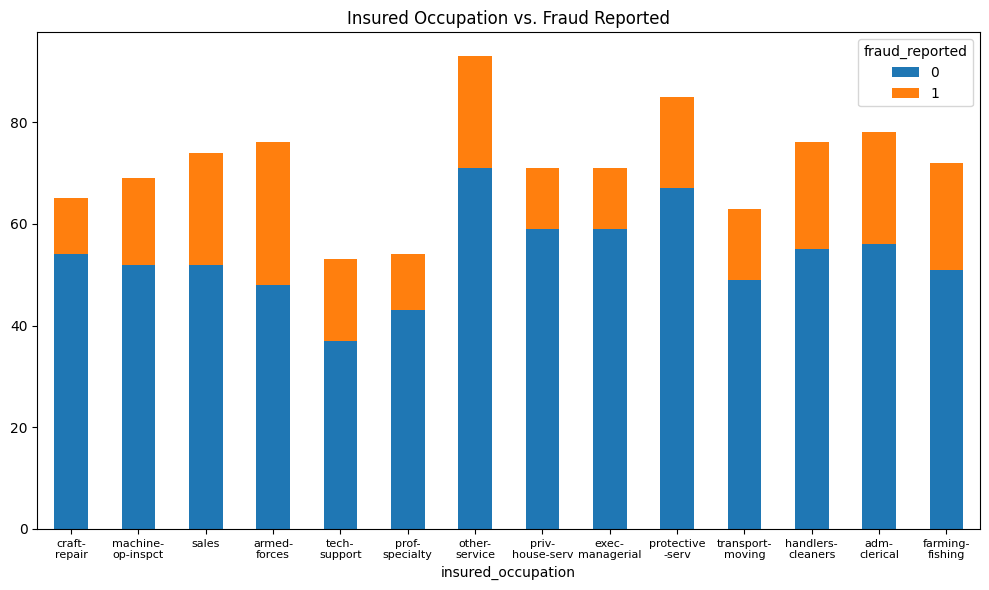

In [229]:
plt.figure(figsize=(10, 6))  # Increase figure size further
ax = pd.crosstab(df['insured_occupation'], df['fraud_reported']).plot(kind='bar', stacked=True, ax=plt.gca())

# Set the title
plt.title('Insured Occupation vs. Fraud Reported')

# Wrap the x-axis labels to avoid overlap
labels = [textwrap.fill(label, 10) for label in df['insured_occupation'].unique()]
ax.set_xticklabels(labels, rotation=0, ha='center')

# Reduce the font size of the x-axis labels
plt.xticks(fontsize=8)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [231]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [296]:
df['months_as_customer'].describe()

count    1000.000000
mean      270.193000
std        88.291399
min       114.000000
25%       196.000000
50%       268.000000
75%       347.000000
max       415.000000
Name: months_as_customer, dtype: float64

In [298]:
df.columns.tolist()


['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [233]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
target_column = 'fraud_reported'
# Replace with your actual target column
df1=df
X = df1.drop(columns=[target_column])
y = df1[target_column]

# Convert categorical variables to numeric using LabelEncoder
# (this is a simple approach; you can use more complex encoding if necessary)
X = X.apply(LabelEncoder().fit_transform)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select the top 25 features
top_features = feature_importance_df.head(25)


print(top_features)

                     feature  importance
20         incident_severity    0.189533
13           insured_hobbies    0.058822
9                insured_zip    0.043780
7      policy_annual_premium    0.038693
31        total_claim_amount    0.036204
34             vehicle_claim    0.035982
33            property_claim    0.035350
32              injury_claim    0.034732
2              policy_number    0.034591
17             incident_date    0.033447
24         incident_location    0.031199
0         months_as_customer    0.030474
1                        age    0.028951
3           policy_bind_date    0.028181
36                auto_model    0.026547
37                 auto_year    0.024470
12        insured_occupation    0.024164
25  incident_hour_of_the_day    0.023430
35                 auto_make    0.022432
15             capital-gains    0.020433
16              capital-loss    0.019850
23             incident_city    0.017127
8             umbrella_limit    0.016372
22            in

In [235]:
df1=df

In [237]:
df1['policy_bind_date'] = pd.to_datetime(df1['policy_bind_date'], errors='coerce')

In [239]:
from dateutil.relativedelta import relativedelta
from datetime import datetime
def calculate_months_between_dates(start_date, end_date):
    """
    Calculate the number of months between two dates.
    """
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

# Get today's date
today_date = datetime.now()

# Calculate the number of months since the policy was bound
df1['months_as_customer'] = df1['policy_bind_date'].apply(lambda x: calculate_months_between_dates(x, today_date) if pd.notnull(x) else None)

In [241]:
print(df1.columns.tolist())

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']


In [243]:
print(df.columns.tolist())

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']


In [245]:
required_columns = [
    'incident_severity',
    'insured_hobbies',
    'insured_zip',
    'policy_annual_premium',
    'policy_number',
    'property_claim',
    'months_as_customer',
    'injury_claim',
    'total_claim_amount',
    'vehicle_claim',
    'incident_location',
    'months_as_customer',
    'incident_date',
    'auto_year',
    'age',
    'fraud_reported'
]
required_columns = [
    'incident_severity',
    'insured_hobbies',
    'insured_zip',
    'policy_annual_premium',
    'policy_number',
    'property_claim',
    'months_as_customer',
    'injury_claim',
    'total_claim_amount',
    'vehicle_claim',
    'incident_location',
    'months_as_customer',
    'incident_date',
    'auto_year',
    'age',
    'insured_occupation',
    'incident_hour_of_the_day',
    'auto_model',
    'auto_make',
    'incident_city',
    'capital-gains',
    'capital-loss',
    'umbrella_limit',
    'incident_state',
    'fraud_reported'# Ensure this column exists or adjust accordingly
]


print(len(required_columns))

25


In [247]:
df1 = df1[required_columns]
df1.head()

,incident_severity,insured_hobbies,insured_zip,policy_annual_premium,policy_number,property_claim,months_as_customer,injury_claim,total_claim_amount,vehicle_claim,...,insured_occupation,incident_hour_of_the_day,auto_model,auto_make,incident_city,capital-gains,capital-loss,umbrella_limit,incident_state,fraud_reported
0,Major Damage,sleeping,466132,1406.91,521585,13020,118,6510,71610,52080,...,craft-repair,5,92x,Saab,Columbus,53300,0,0,SC,1
1,Minor Damage,reading,468176,1197.22,342868,780,218,780,5070,3510,...,machine-op-inspct,8,E400,Mercedes,Riverwood,0,0,5000000,VA,1
2,Minor Damage,board-games,430632,1413.14,687698,3850,287,7700,34650,23100,...,sales,7,RAM,Dodge,Columbus,35100,0,5000000,NY,0
3,Major Damage,board-games,608117,1415.74,227811,6340,411,6340,63400,50720,...,armed-forces,5,Tahoe,Chevrolet,Arlington,48900,-62400,6000000,OH,1
4,Minor Damage,board-games,610706,1583.91,367455,650,122,1300,6500,4550,...,sales,20,RSX,Accura,Arlington,66000,-46000,6000000,NY,0


In [249]:
columns_to_encode = df1.select_dtypes(include=['object']).columns



In [251]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   incident_severity         1000 non-null   object 
 1   insured_hobbies           1000 non-null   object 
 2   insured_zip               1000 non-null   int64  
 3   policy_annual_premium     1000 non-null   float64
 4   policy_number             1000 non-null   int64  
 5   property_claim            1000 non-null   int64  
 6   months_as_customer        1000 non-null   int64  
 7   injury_claim              1000 non-null   int64  
 8   total_claim_amount        1000 non-null   int64  
 9   vehicle_claim             1000 non-null   int64  
 10  incident_location         1000 non-null   object 
 11  months_as_customer        1000 non-null   int64  
 12  incident_date             1000 non-null   object 
 13  auto_year                 1000 non-null   int64  
 14  age      

In [253]:
df1.head()


,incident_severity,insured_hobbies,insured_zip,policy_annual_premium,policy_number,property_claim,months_as_customer,injury_claim,total_claim_amount,vehicle_claim,...,insured_occupation,incident_hour_of_the_day,auto_model,auto_make,incident_city,capital-gains,capital-loss,umbrella_limit,incident_state,fraud_reported
0,Major Damage,sleeping,466132,1406.91,521585,13020,118,6510,71610,52080,...,craft-repair,5,92x,Saab,Columbus,53300,0,0,SC,1
1,Minor Damage,reading,468176,1197.22,342868,780,218,780,5070,3510,...,machine-op-inspct,8,E400,Mercedes,Riverwood,0,0,5000000,VA,1
2,Minor Damage,board-games,430632,1413.14,687698,3850,287,7700,34650,23100,...,sales,7,RAM,Dodge,Columbus,35100,0,5000000,NY,0
3,Major Damage,board-games,608117,1415.74,227811,6340,411,6340,63400,50720,...,armed-forces,5,Tahoe,Chevrolet,Arlington,48900,-62400,6000000,OH,1
4,Minor Damage,board-games,610706,1583.91,367455,650,122,1300,6500,4550,...,sales,20,RSX,Accura,Arlington,66000,-46000,6000000,NY,0


In [255]:
df2 = pd.get_dummies(df1, columns = columns_to_encode)

df2.head()

,insured_zip,policy_annual_premium,policy_number,property_claim,months_as_customer,injury_claim,total_claim_amount,vehicle_claim,months_as_customer,auto_year,...,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV
0,466132,1406.91,521585,13020,118,6510,71610,52080,118,2004,...,False,False,False,False,False,False,False,True,False,False
1,468176,1197.22,342868,780,218,780,5070,3510,218,2007,...,False,True,False,False,False,False,False,False,True,False
2,430632,1413.14,687698,3850,287,7700,34650,23100,287,2007,...,False,False,False,False,True,False,False,False,False,False
3,608117,1415.74,227811,6340,411,6340,63400,50720,411,2014,...,False,False,False,False,False,True,False,False,False,False
4,610706,1583.91,367455,650,122,1300,6500,4550,122,2009,...,False,False,False,False,True,False,False,False,False,False


In [257]:
features = []
for col in df2.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df2[features]
y = df2[target]

In [259]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [263]:

def plot_classification_report(y_true, y_pred, title='Classification Report', output_file='classification_report.png'):
    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the classification report to a DataFrame
    df = pd.DataFrame(report).transpose()
    
    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    
    # Save the plot to a file
    plt.savefig(output_file)
    plt.close()

In [265]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.732


In [267]:
print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)
plot_classification_report(y_test, preds, title='Logistic Regression Classification Report', output_file='lr_classification_report.png')


              precision    recall  f1-score   support

           0       0.73      0.99      0.84       180
           1       0.71      0.07      0.13        70

    accuracy                           0.73       250
   macro avg       0.72      0.53      0.49       250
weighted avg       0.73      0.73      0.64       250



In [268]:
oversample = SMOTE(random_state=9)

In [271]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state = 1)

In [275]:
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)

0.9721254355400697

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       144
           1       0.98      0.97      0.97       143

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287



In [276]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)

score = dtc.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)

0.867595818815331

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       144
           1       0.87      0.87      0.87       143

    accuracy                           0.87       287
   macro avg       0.87      0.87      0.87       287
weighted avg       0.87      0.87      0.87       287



In [279]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [282]:
preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()

print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)

89.19860627177701

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       144
           1       0.89      0.89      0.89       143

    accuracy                           0.89       287
   macro avg       0.89      0.89      0.89       287
weighted avg       0.89      0.89      0.89       287



In [285]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

preds = svc.predict(X_test)

print('Score:' , svc.score(X_test, y_test))
print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)

Score: 0.975609756097561
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       144
           1       0.98      0.97      0.98       143

    accuracy                           0.98       287
   macro avg       0.98      0.98      0.98       287
weighted avg       0.98      0.98      0.98       287



In [287]:
degrees = [2,3,4,5,6,7,8]
kernels = ['poly', 'rbf', 'sigmoid']
c_value = [1,2,3]

In [289]:
scores = {}
for degree in degrees:
    for kernel in kernels:
        for c in c_value:
            svc_t = SVC(kernel = kernel, degree = degree, C = c)
            svc_t.fit(X_train, y_train)
            
            preds = svc_t.predict(X_test)
            score = svc_t.score(X_test,y_test)
#             print('Score with degree as {d}, kernel as {k}, C as {c} is:'.format(d = degree, k = kernel, c = c), score)
            scores['Score with degree as {d}, kernel as {k}, C as {c} is best'.format(d = degree, k = kernel, c = c)] = score

print(max(scores, key=scores.get))

Score with degree as 2, kernel as sigmoid, C as 1 is best


In [290]:
svc_tuned = SVC(kernel='sigmoid', degree = 2, C = 3)
svc_tuned.fit(X_train, y_train)

preds = svc_tuned.predict(X_test)

print('Score:' , svc_tuned.score(X_test, y_test))
print(classification_report(y_test, preds))
plot_classification_report(y_test, preds)


Score: 0.9686411149825784
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.97      0.97      0.97       143

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287



In [291]:
rfc_tuned = RandomForestClassifier(n_estimators = 1000, random_state = 1, min_samples_split = 2)
rfc_tuned.fit(X_train, y_train)
preds_tuned = rfc_tuned.predict(X_test)
score = rfc_tuned.score(X_test, y_test)
print(score)
plot_classification_report(y_test, preds_tuned)
print(classification_report(y_test, preds))



0.89198606271777
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.97      0.97      0.97       143

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287

